# Admin Updates
- For science majors: [WSNS course planning](https://highpointuniversity-my.sharepoint.com/:i:/g/personal/aanthon2_highpoint_edu/Eem7FIFw8HpDt0a9w2s5RfYBQlZoc5yahgkPGnbn6NiVEw?e=IfncRb)
- Assesment Monday
- Schedule Updates
 - Project introduction Wed
 - Start of new unit following Mon

# Changing Assumptions (pre-class)
  - In class, we assumed fixed numbers for our monthly contribution while saving and monthly withdraw while retired. Instead, I would like to assume we are contributing a percentage of our salary. Adjust the model to assume a fixed salary (a new variable), and assume a percentage of our monthly income we will contribute each month (a new variable) which will replace the "investAmount" variable. (For example if we are making \$50,000 per year and contributing \$1000 per month, our contribution is 24%).
  - Adjust the model to assume that in retirement rather than withdrawing a fixed amount of money we are withdrawing a percent of our income at retirement age. This should add a variable in our model to replace the "spendingAmount" variable in use. (For example if we are making \$50,000 per year at retirement and withdrawing \$4000 per month, our withdraw rate is 96%).
  - Our contributions and withdraws now are determined by three variables. Salary, contribution rate, and withdraw rate. Keeping the contribution and withdraw rates the same, how does the retirement age depend on the salary?
  - In reality, you usually do not make the same amount of money each year of your life. Let's break that assumption. Instead, let's assume each year you are working you get a fixed percentage raise (assume 1% above the inflation rate which is 0% in our model). Add a variable to track that percentage yearly raise and adjust your model so your salary is adjusted upwards at the end of each year you are working (and since you are contributing a percentage of your income, your monthly contributions are as well). Using your adjusted model, what is your new retirement age? How much money are we withdrawing each month in retirement? What was our salary at retirement?
  - Suppose in retirement we live off of the same amount we did when we were working (our withdraw rate is 1 - our contribution rate). What is our retirement age?
  - Suppose we can only contribute 10% of our income each month, what is our retirement age?
  - Assuming we contribute 15% of our income, and we require 70% in retirement, what is our retirement age? What is our retirement age if we lived to 90 instead of 85? What is our retirement age if we want to make sure our IRA is still growing over retirement (i.e. the balance never decreases).

At death we have $1788452.4632938309 left in our account


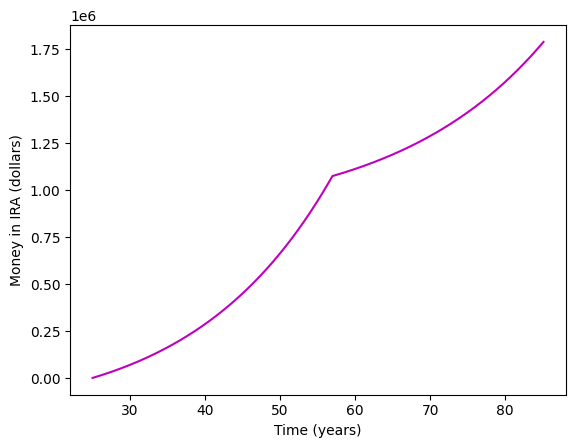

In [ ]:
import matplotlib.pyplot as plt

# Define input variables (Age of death, retierment age, current age, amount invensted each month, intrest rate, timestep, amount spending each month)
rAge = 57 #years
deathAge = 85 # in years

salary = 10000
percentC = 0.10
percentS = 0.25
percentRaise = 0.01

intrestRate = 0.05 # APR
rInt = intrestRate #/ 12 # rate for monthly compounding
dt = 1 / 12 #years


# Define variables that are changing (age and amount of money currently in retirement acount)
t = 25 #years
P = 0 # $
totalINT = 0

# Initialize empty lists for plotting
tdata = []
Pdata = []
INTdata = []

month = 1
# Loop ( while time is less than age of death )
while t < deathAge:


  # Calculate rate of chage (invesment returns - intrest rate * amount currently in account)
  rate = rInt * P
  # Calcualte intrest earned this month (rate of change * timestep)
  INT = rate * dt
  # Update amount of money in retirement account ( add intrest earned )
  P = P + INT
  totalINT += INT
  INTdata.append(totalINT)


  # if age < retirement age then add monthly contribution
  if t < rAge:
    investAmount = salary*percentC
    P = P + investAmount

    month = month + 1
    # if it's the last month in a year, increase salary
    if month == 12 :
      salary = salary + salary*percentRaise
      month = 1
  # or if age > retirement age then subtract monthly spending
  else:
    spendingAmount = salary*percentS
    P = P - spendingAmount

  # Update time passing
  t = t + dt

  # Add current state to lists
  tdata.append(t)
  Pdata.append(P)

print(f"At death we have ${P} left in our account")

# Add code to plot lists
plt.plot(tdata, Pdata, "m-")
#plt.plot(tdata, INTdata, "b-")
plt.xlabel("Time (years)")
plt.ylabel("Money in IRA (dollars)")
plt.show()

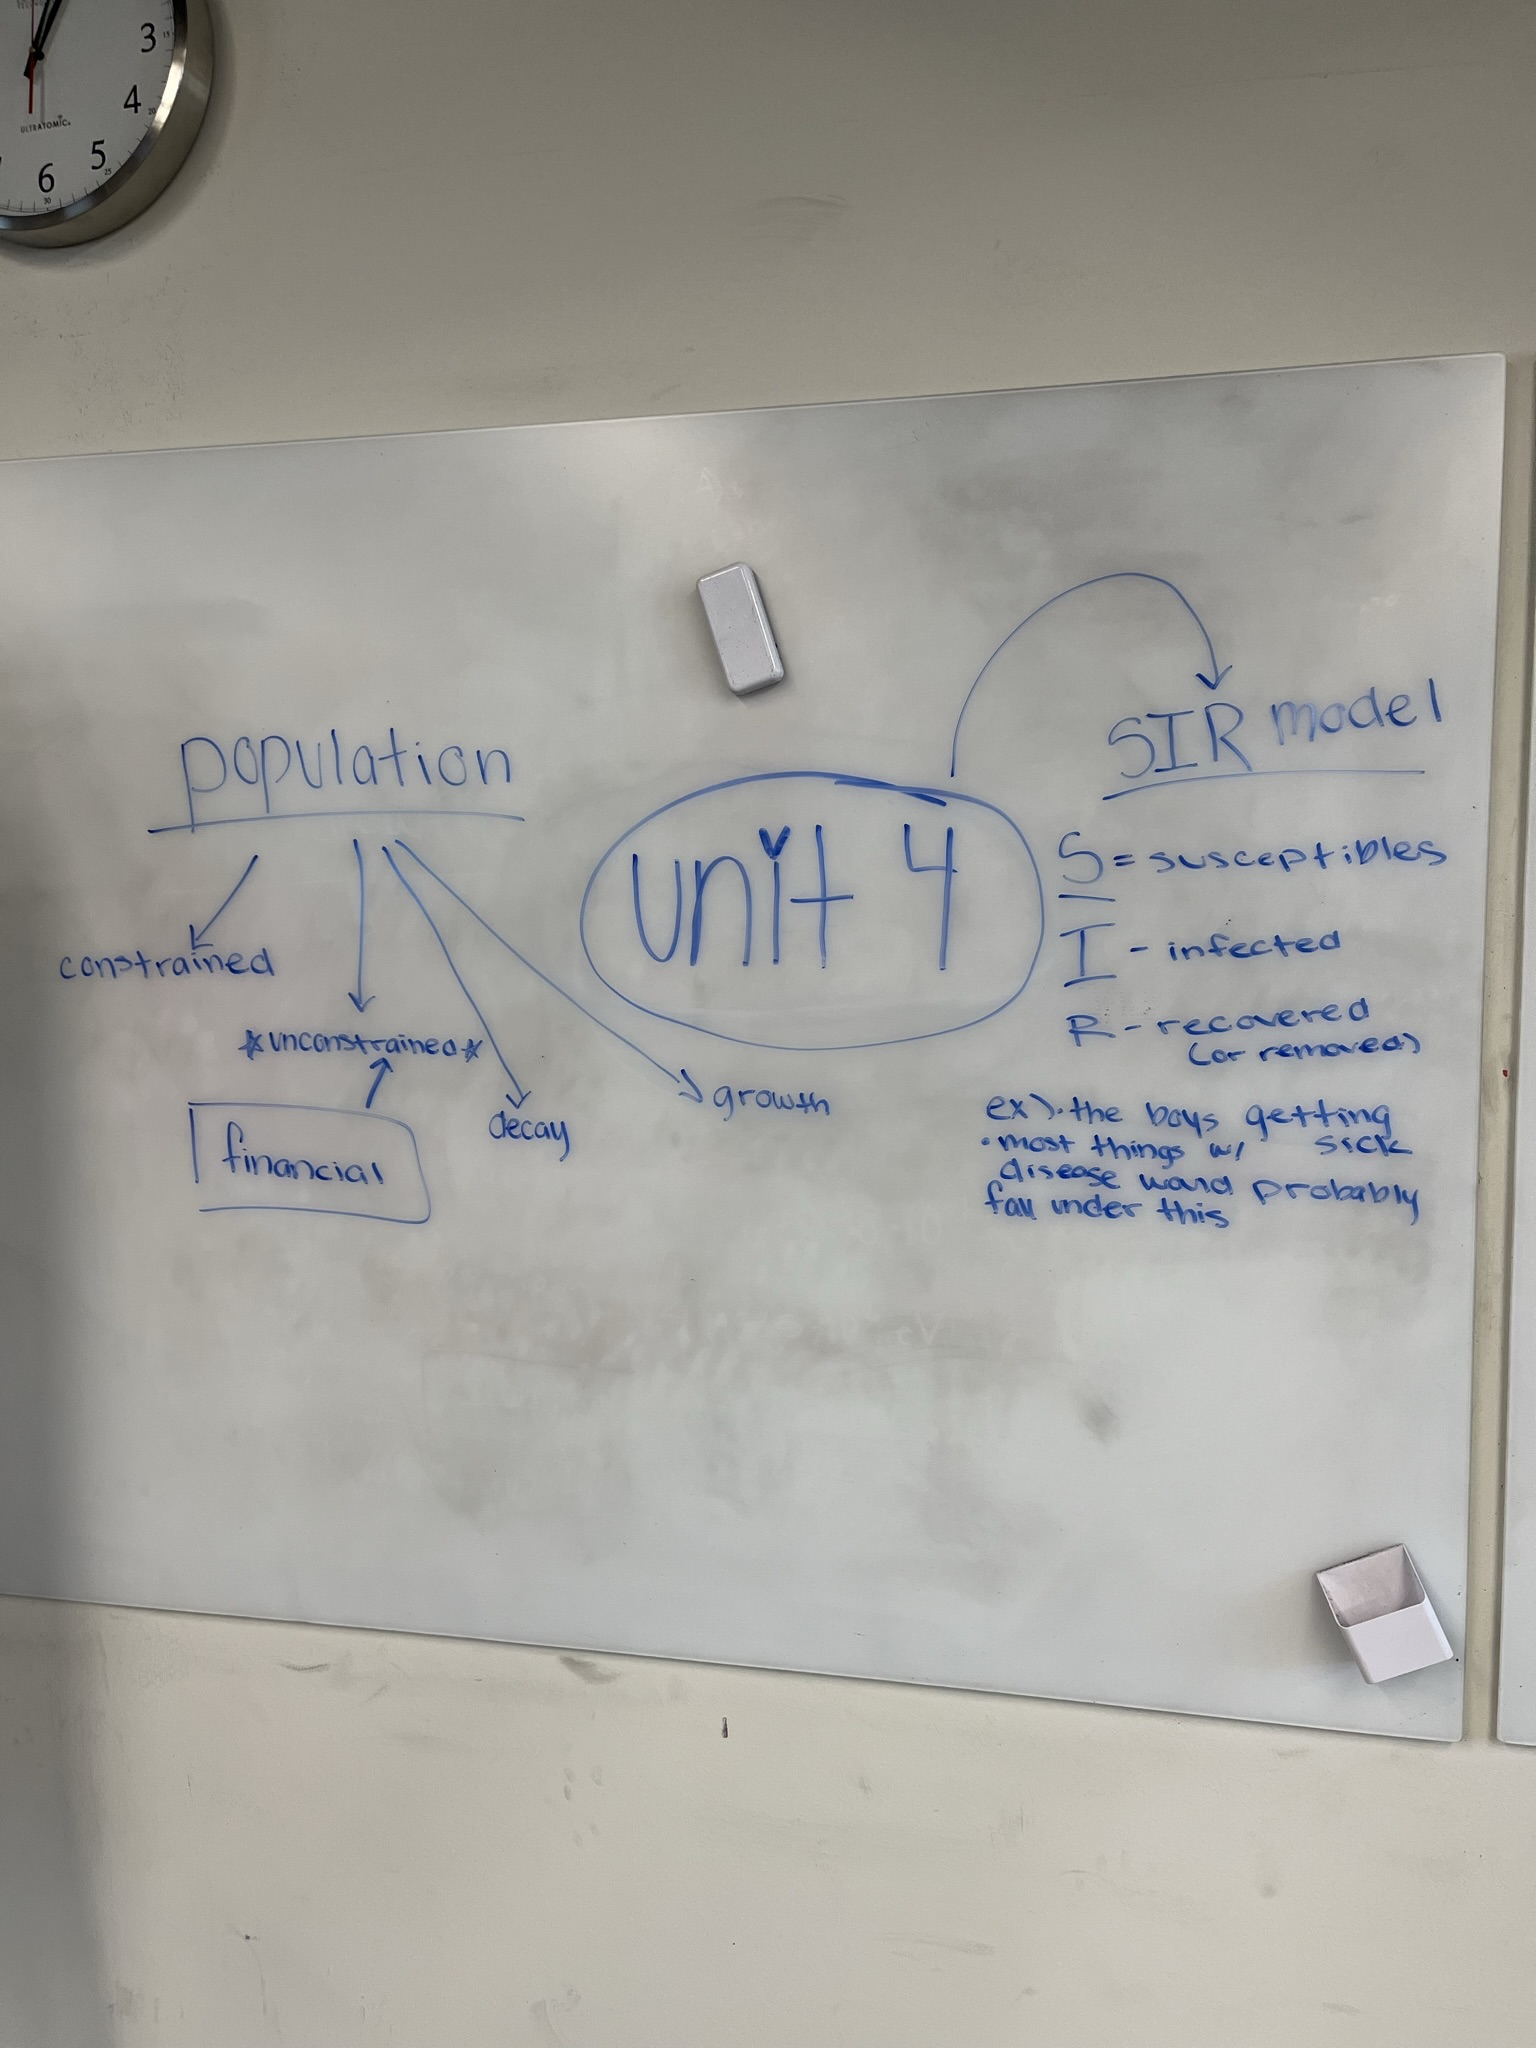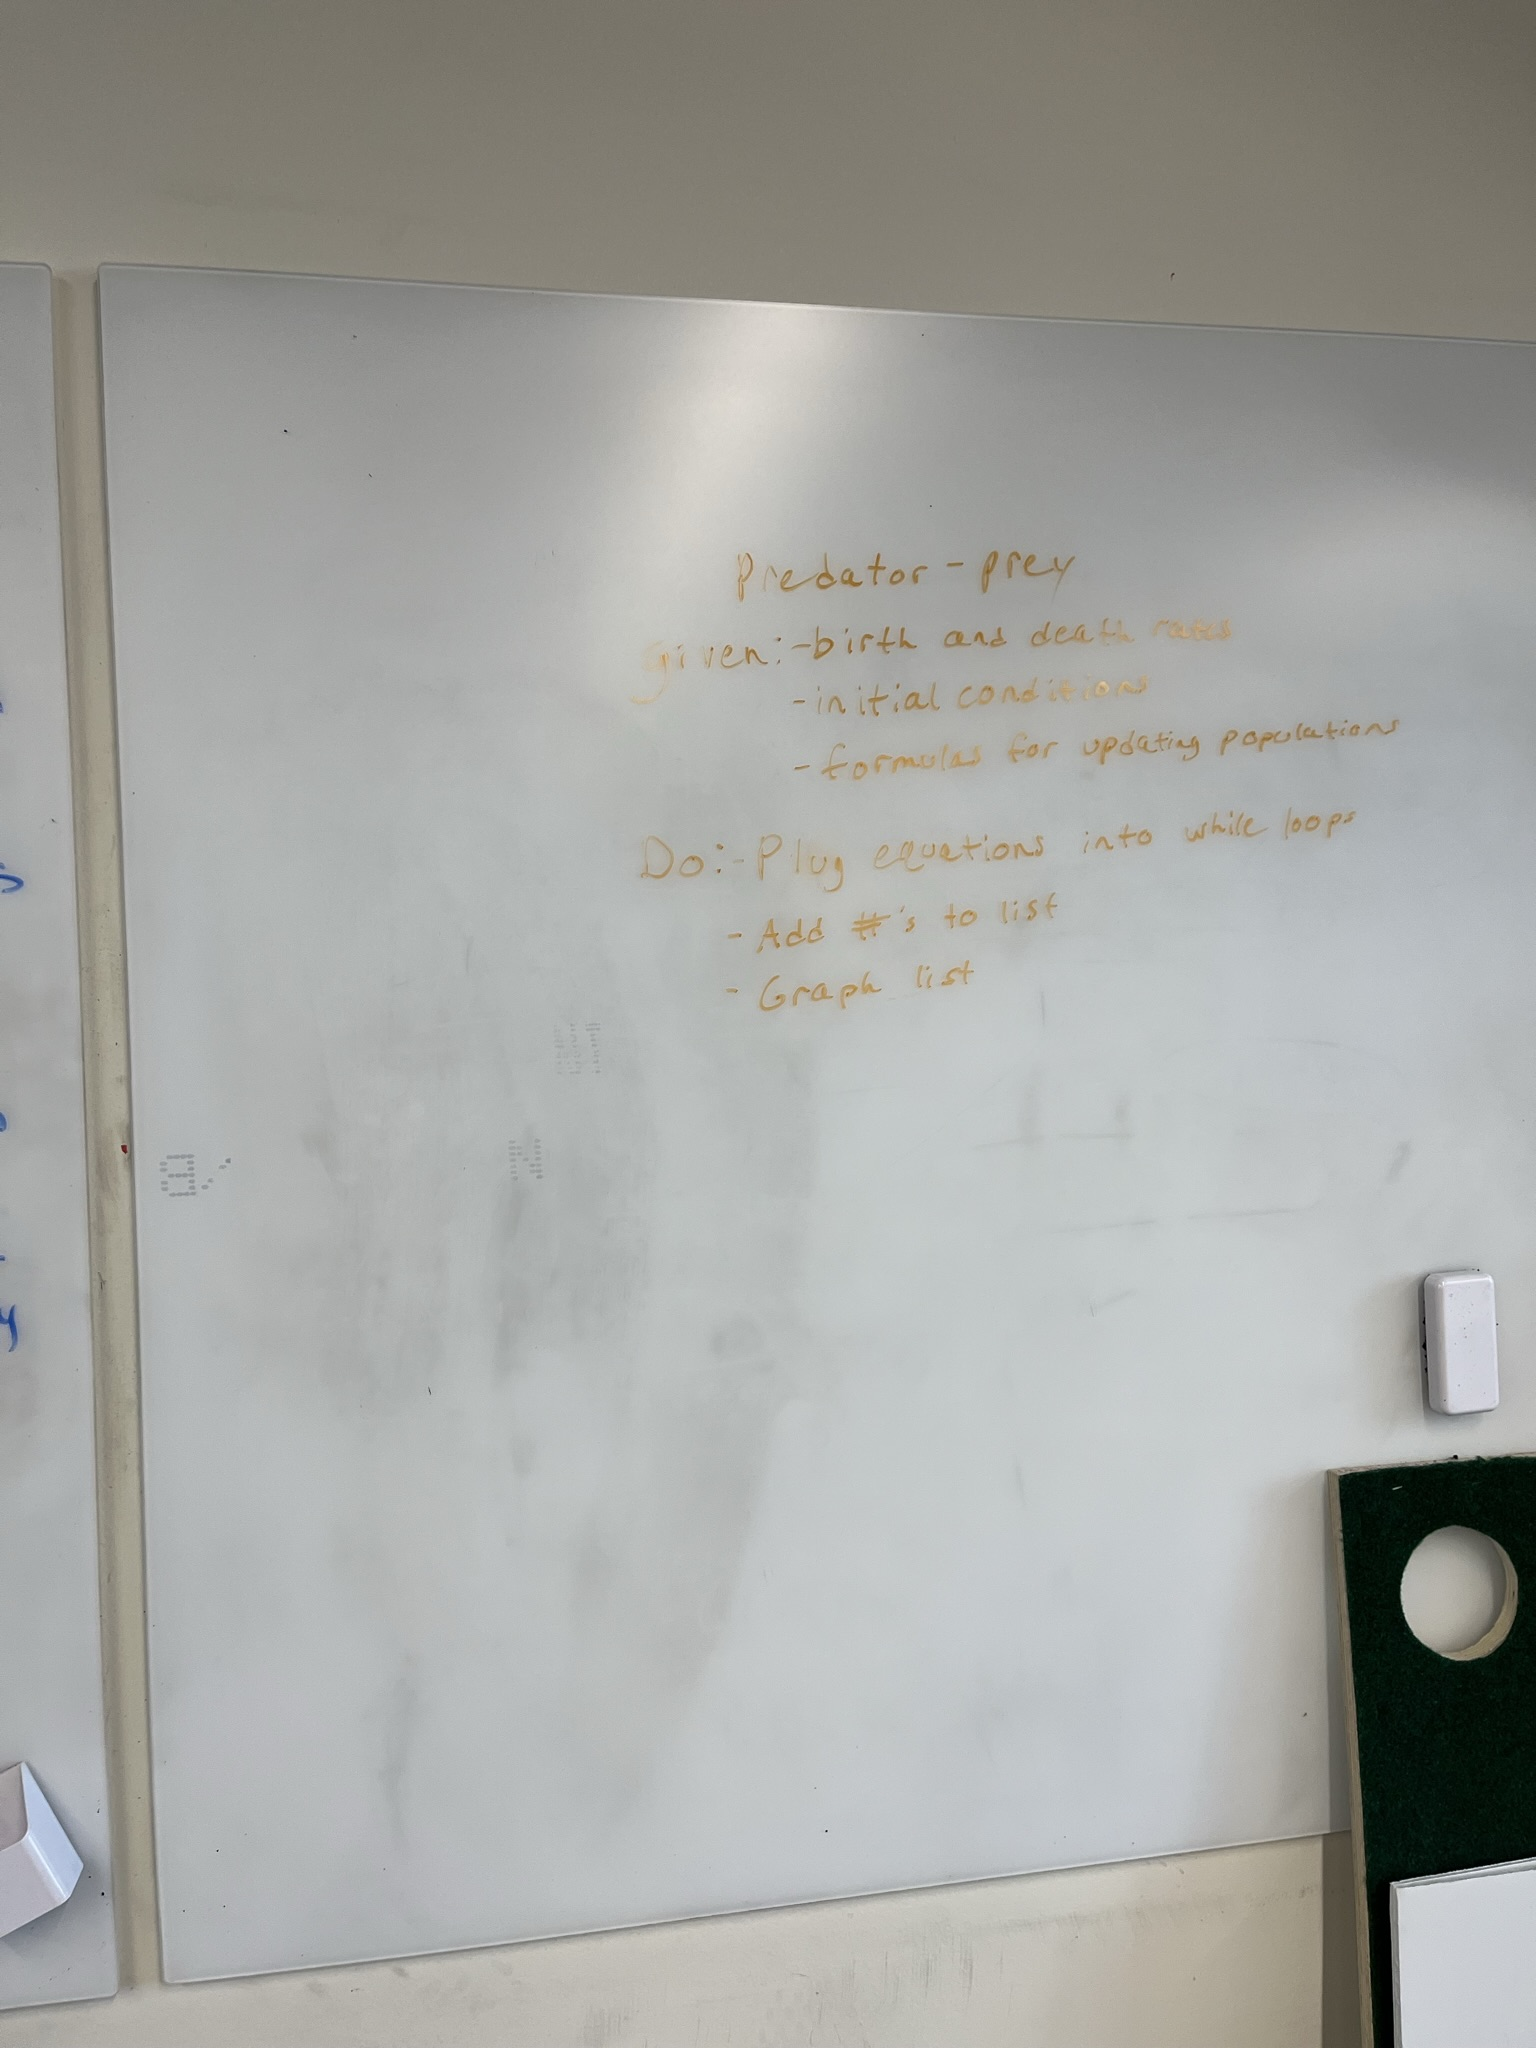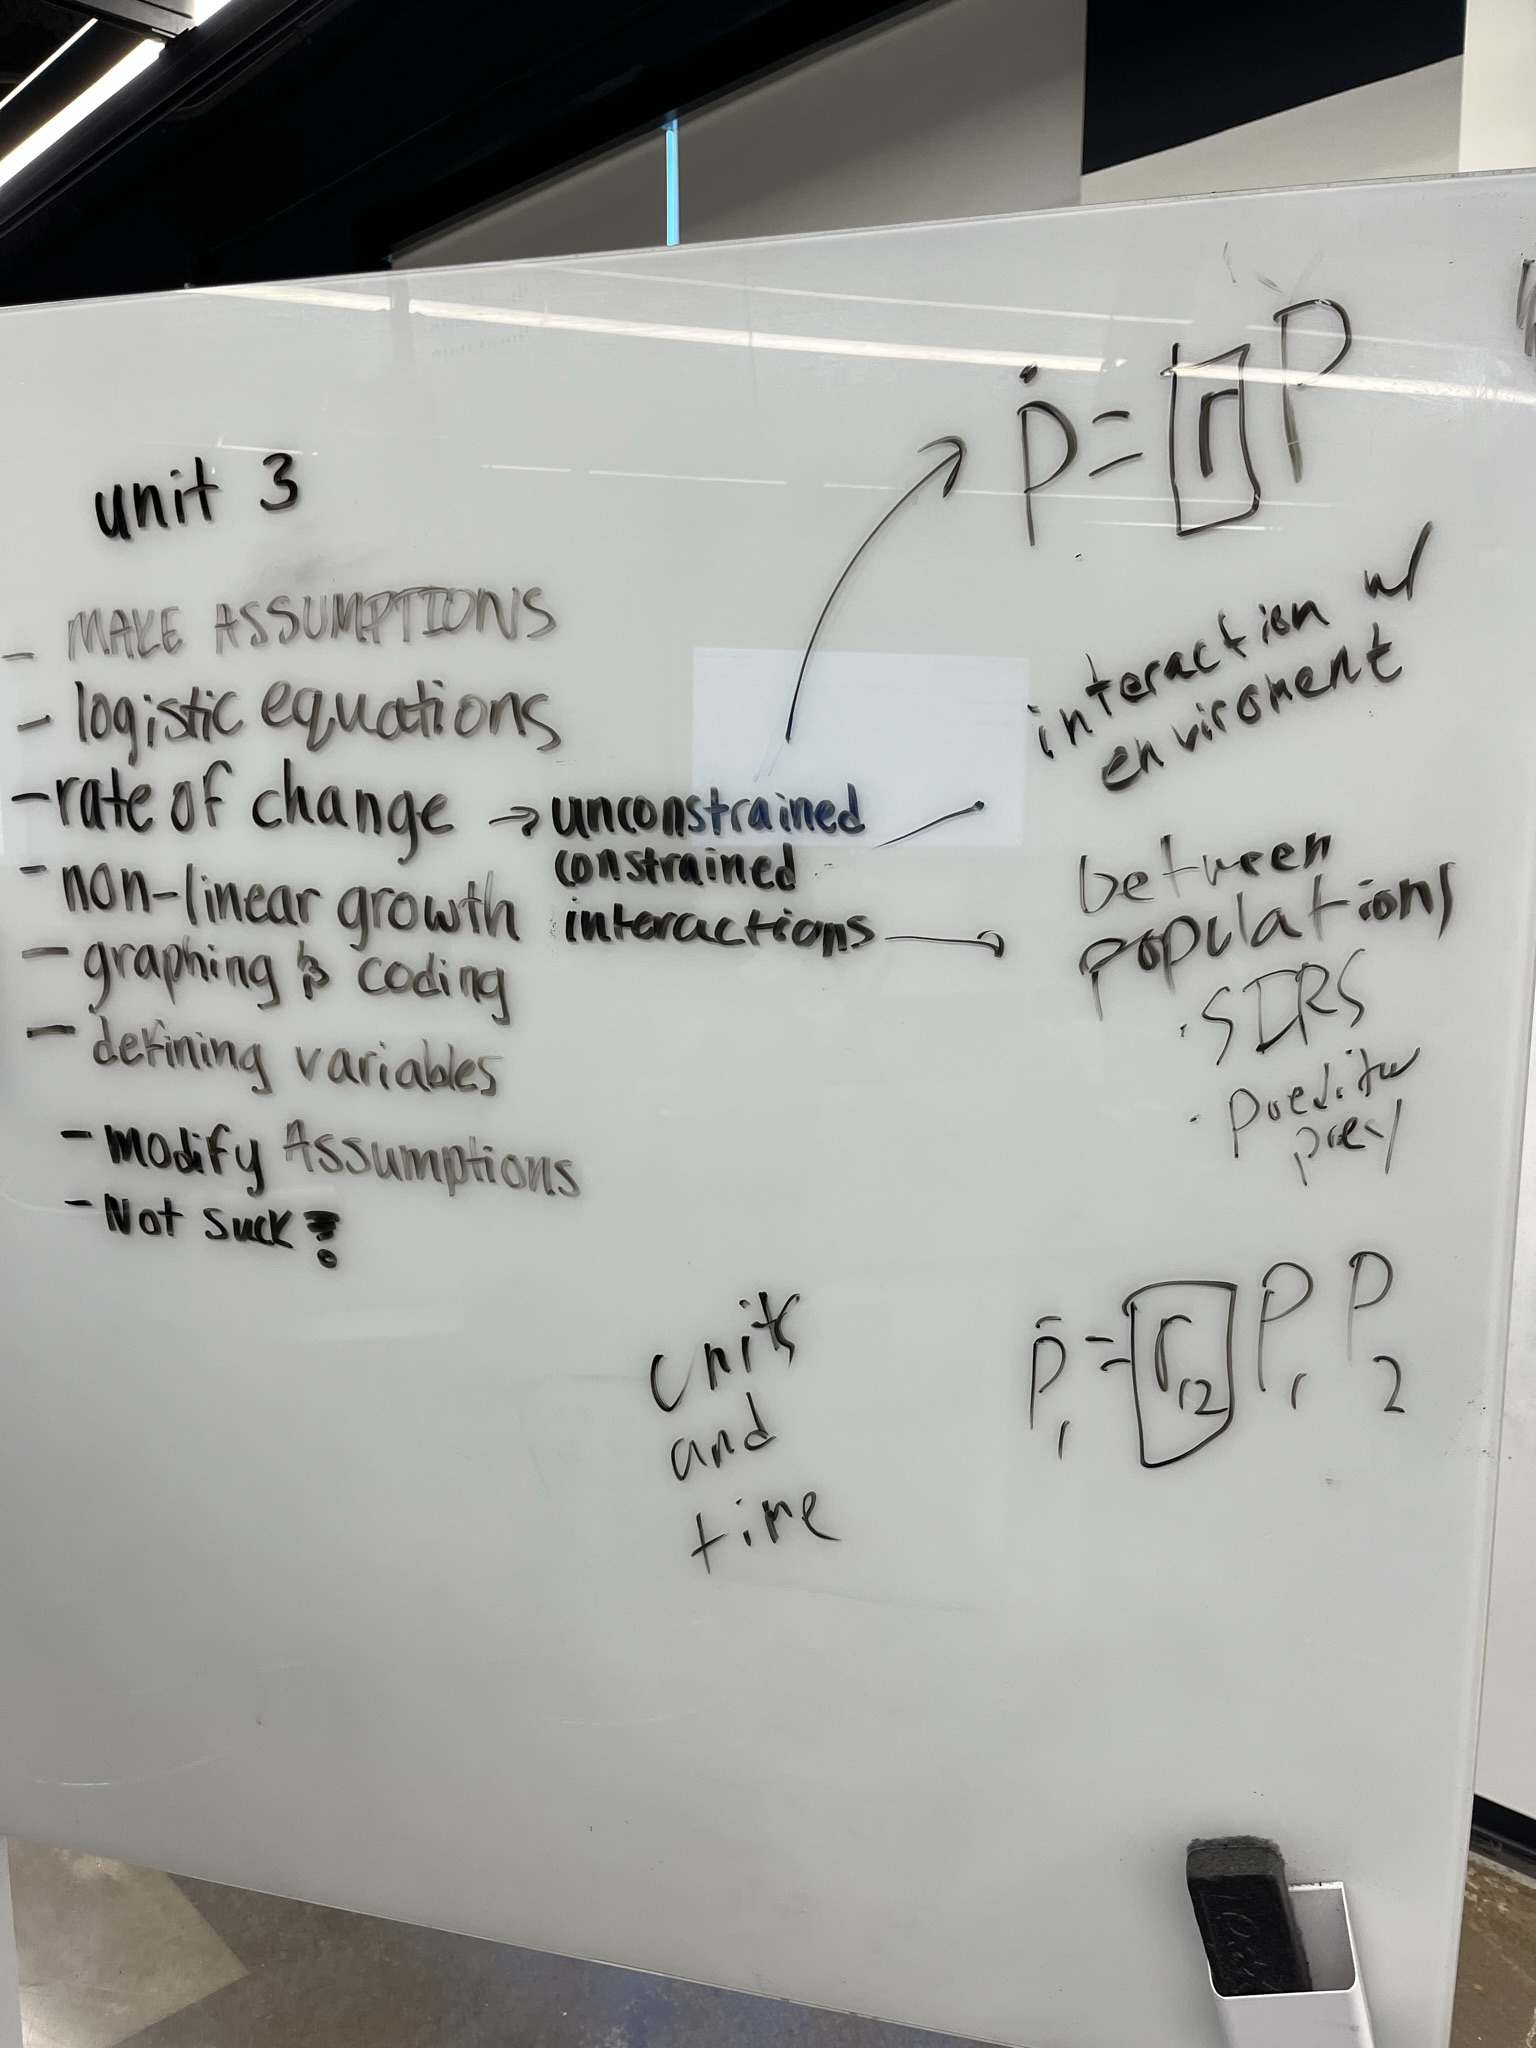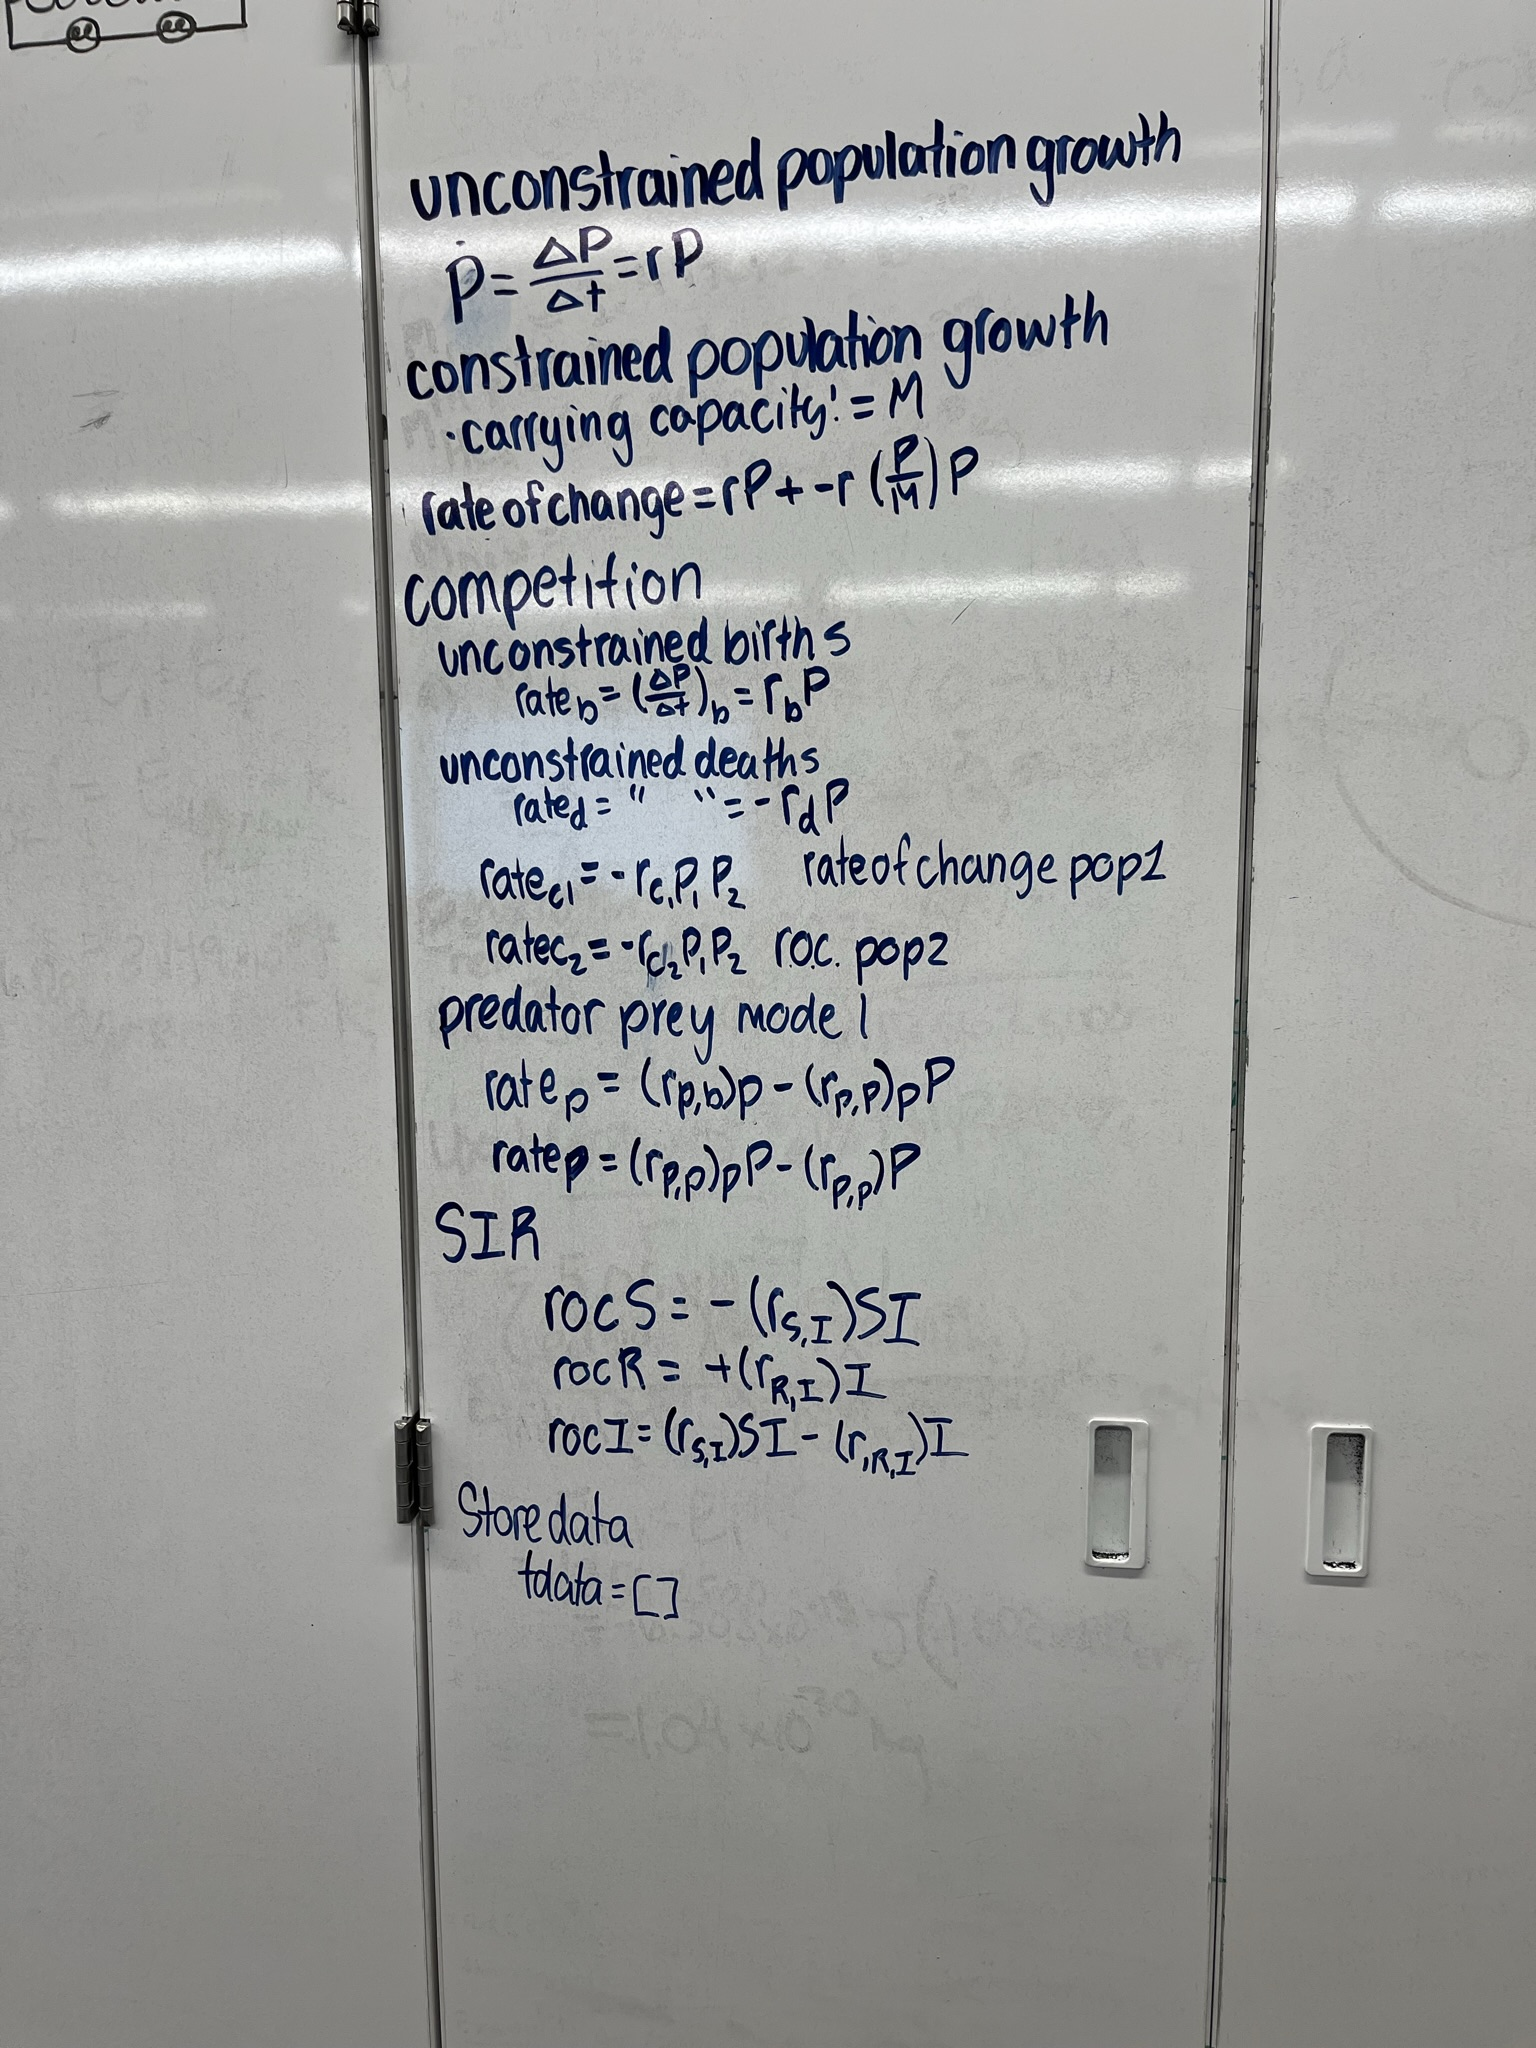

# Review (problems)